<a href="https://colab.research.google.com/github/Elizajr/CursoMetodosComputacionales/blob/main/Laboratorio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy import optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Código Markdown

## a. Pseudocódigo Bisección

1.   Definir una función, 2 valores extremos=$\{a,b\}$ (tales que $f(a)f(b) <0$)  y una tolerancia
2.   Calculamos el punto medio (p') de a,b. Así:
\begin{equation}
p'=\frac{a+b}{2}
\end{equation}
3.   Evaluamos $f(p')$ y comparamos con 0
4.   Si $f(p')=0→p=p'$, es decir $p'$ es una raíz de $f$. WIIIIIIIIIIII
5.   Si $f(p')\not = 0$, entonces:
  1. Si $f(p')f(a)>0 → p\in(p',b)$ entonces nuestras nuevas variables son $a'=p'$ y $b'=b$ permanece igual.
  2. Si $f(p')f(a)<0 → p\in(p',b)$ entonces nuestras nuevas variables son $b'=p'$ y $a'=a$  permanece igual.
6. Repetimos el ciclo con nuestras nuevas variables.














## b. Deducción método Newton- Rapson
Se usa la expansión de Taylor de $f$ alrededor de $x_n$, tenemos que:
$$f(x)=f(x_n)+f'(x_n)(x-x_n)+\frac{f''(\xi)}2(x-x_n)^2$$
Donde $\xi$ es un punto entre $x$ y $x_n$.
Cuando $x=\alpha$:
$$ 0=f(\alpha)=f(x_n)+f'(x_n)+\frac{f''(\xi)}2(\alpha-x_n)^ 2$$
Despejando $\alpha$ resulta:
$\alpha \simeq x_0-\frac{f(x_0)}{f'(x_0)}=x_1$

## c. Diferencia Newton respecto a la secante
El método de la secante es una variante de Newton-Raphson en la que el cálculo de la derivada en $x_k$ se sustituye por una aproximación.
Este algoritmo converge más lentamente que el de Newton-Raphson

## d. Pseudocódigo Punto Fijo


1. Ubicamos la raíz $f(x)$ analizando la gráfica.
2. Reescribimos la función de la forma $x=g(x)$.
3. Obtenemos su derivada $g'(x)$
4. Obtenemos el rango de valores en el cuál está el punto fijo $R$ resolviendo la desigualdad $-1 \leq g'(x) \leq 1$
5. Con $R$ buscamos la raíz en $g(x)$, haciendo iteración de las operaciones hasta que $g(R)=R$

# Ceros de funciones


In [3]:
def f(x):
  return np.cos(np.exp(x)-2)+2-np.exp(x)

def fprime(x):
  return -np.sin(np.exp(x)-2)*np.exp(x)-np.exp(x)

In [4]:
#=============================================================
#con el método de bisección
#=============================================================
a=0
b=2
bisec=optimize.bisect(f,a,b)
newton=optimize.newton(f,3,fprime=fprime)
fijo=optimize.fixed_point(f,1)
real=optimize.root(f,1)["x"][0]
guardar={"bisec":bisec,"newton":newton,"fijo":fijo,"real":real}
diferencia={}
nombre=list(guardar.keys())
leng=len(guardar)
for i in range(leng):
  for m in range(leng):
    if m!=i:
      diferencia["|"+nombre[i]+"-"+nombre[m]+"|"]=abs(guardar[nombre[i]]-guardar[nombre[m]])
diferencia

{'|bisec-newton|': 1.7790213746593508e-12,
 '|bisec-fijo|': 0.2214790439833546,
 '|bisec-real|': 1.7787993300544258e-12,
 '|newton-bisec|': 1.7790213746593508e-12,
 '|newton-fijo|': 0.22147904398513363,
 '|newton-real|': 2.220446049250313e-16,
 '|fijo-bisec|': 0.2214790439833546,
 '|fijo-newton|': 0.22147904398513363,
 '|fijo-real|': 0.2214790439851334,
 '|real-bisec|': 1.7787993300544258e-12,
 '|real-newton|': 2.220446049250313e-16,
 '|real-fijo|': 0.2214790439851334}

# Movimiento de proyectiles en presencia de viento.


In [5]:
g=9.8
#===============================================================================
def v(v0,theta):
  return v0*np.array([np.cos(theta),np.sin(theta)])
#===============================================================================
# u velocidad del viento
# \alpha ángulo dirección de esta velocidad con el eje x
#b páramentro de rozamiento
#===============================================================================
def pos_x(t,u,alpha,b,v0,theta):
  x=(u*np.cos(alpha)*t+(1/b)*(v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp(-b*t)))
  return x
#===============================================================================
def pos_y(t,u,alpha,b,v0,theta):
  y=(1/b)*((g/b)+v0*np.sin(theta)-u*np.sin(alpha))*(1-np.exp(-b*t))-((g/b)-u*np.sin(alpha))*t
  return y
#===============================================================================

In [6]:
#==============================================================================
#Condiciones iniciales
#==============================================================================
v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion
g = 9.8                #Aceleracion de la gravedad m/s2
Params = (u,alpha,b,v0,theta)  #Parametros en tupla.
tv=optimize.root(pos_y,12,args=Params)["x"][0]


In [7]:
T=np.linspace(0,tv,1000)
X=pos_x(T,u,alpha,b,v0,theta)
Y=pos_y(T,u,alpha,b,v0,theta)
guardar={"x":X,"y":Y,"Tiempo":T}
df=pd.DataFrame(guardar)
df.head()

,x,y,Tiempo
0,0.000000,0.000000,0.000000
1,0.344372,0.344099,0.008120
2,0.688506,0.687412,0.016239
3,1.032401,1.029940,0.024359
4,1.376058,1.371682,0.032479


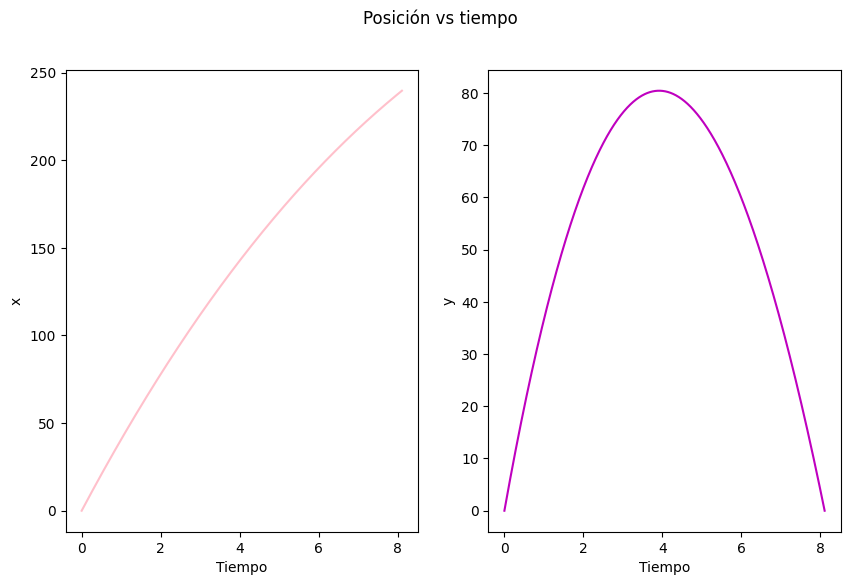

In [8]:
fig,axs=plt.subplots(1,2,figsize=(10,6))
axs[0].plot(df['Tiempo'],df['x'],c="pink")
axs[0].set_xlabel("Tiempo")
axs[0].set_ylabel("x")
axs[1].set_xlabel("Tiempo")
axs[1].set_ylabel("y")
axs[1].plot(df['Tiempo'],df['y'],c="m")
fig.suptitle("Posición vs tiempo")
plt.show()

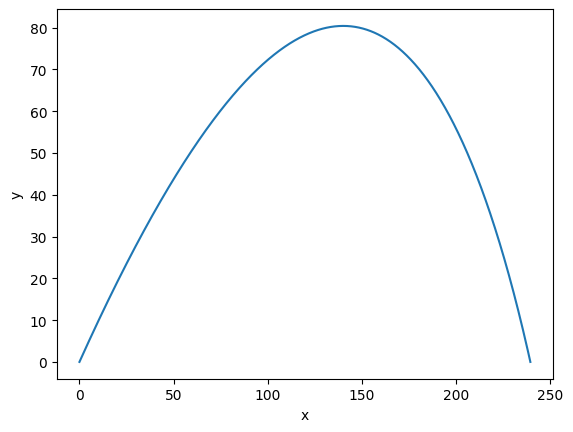

In [9]:
plt.figure()
plt.plot(df["x"], df["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

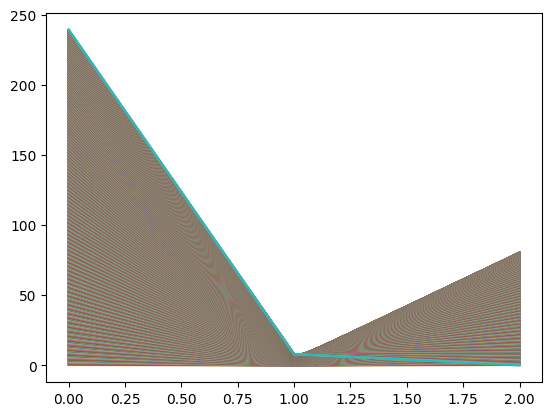

In [10]:
plt.figure()
plt.plot((df["x"], df["Tiempo"], df["y"]))
plt.show()

In [11]:
x_max=pos_x(tv,u,alpha,b,v0,theta)
print(f"El alcance máximo de la partícula para 45°= {x_max:.5}m")

El alcance máximo de la partícula para 45°= 239.61m


In [12]:
THETA=np.arange(10,80,5)
THETA=np.deg2rad(THETA)
X_MAX=np.zeros(len(THETA))
n=0
for t in THETA:
    Params = (u,alpha,b,v0,t)  #Parametros en tupla.
    tv=optimize.root(pos_y,12,args=Params)["x"][0]
    X_MAX[n]=pos_x(tv,u,alpha,b,v0,t)
    n+=1


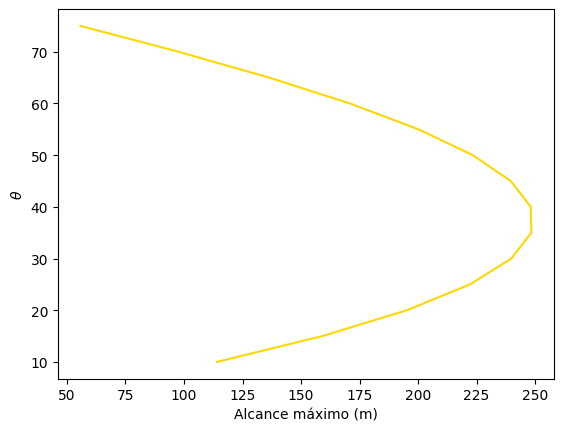

In [13]:
plt.figure()
plt.plot(X_MAX,np.rad2deg(THETA),c="gold")
plt.xlabel("Alcance máximo (m)")
plt.ylabel("$θ$")
plt.show()

# Métodos de punto fijo

In [14]:
# "_n" implica que la variable está normaliza
M_e=5.9722e24
M_n = 5.4
M = M_n*M_e
#Masa de la tierra y el planeta a encontrar

p0=1.8e4
p_n=p0/5520 #normalizado densidad tierra
#densidades

R_e = 6371e3
R_real = 0.48*R_e
#Radios

L=6.5e6
L_n = L / R_e
#longitud

def integral(R,p0,L):
    integral=p0*L*(2*L**2 + 2*L*R + R**2 - (2*L**2)*np.exp(R/L))*np.exp(-R/L)
    return integral+2*L**3*p0

def radio(r,p0,L,M):
    return (M+4*np.pi*integral(r,p0,L))/M_e


In [15]:
rp = radio(0,p0,L,M)
r_n = radio(1.84,p_n,L_n,M_n)
rp

26.202622664824013

Verdaderamente este me desesperó y me canse de intentar

# Fractal

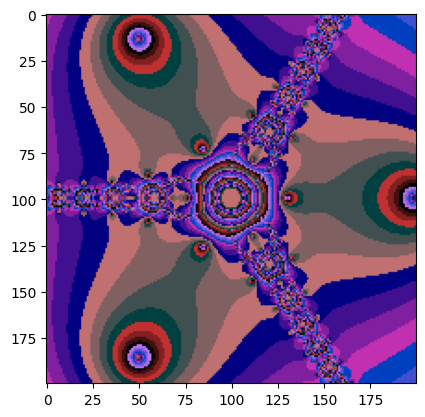

In [17]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 200 #Numero de pixeles en x
Npx_Y = 200 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
